<a href="https://colab.research.google.com/github/AnouskaJ/MovieSentimentalAnalysis/blob/main/MovieReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""IMDB Dataset Sentimental Analysis"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use("ggplot")



In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


Text(0.5, 1.0, 'Sentimental Analysis')

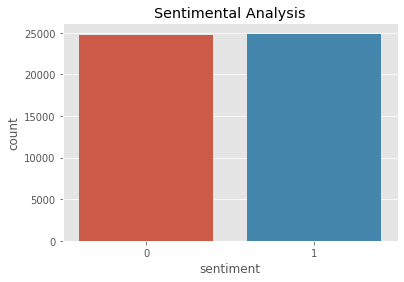

In [ ]:
sns.countplot(x="sentiment", data=df)
plt.title("Sentimental Analysis")

In [ ]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)

In [ ]:
def data_preprocessing(text):
  text=text.lower()
  text=re.sub("<br />", "", text)
  text=re.sub(r'https\S+|www\S+|http\S+', "", text, flags=re.MULTILINE)
  text=re.sub(r"\@w+|\#", "", text)
  text=re.sub(r"[^\w\s]", "", text)
  text_tokens=word_tokenize(text)
  filtered_text=[w for w in text_tokens if not w in stop_words]
  return " ".join(filtered_text)

In [ ]:
df.review=df["review"].apply(data_preprocessing)

In [ ]:
duplicated_count=df.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  422


In [ ]:
df=df.drop_duplicates("review")

In [ ]:
stemmer= PorterStemmer()
def stemming(data):
  text=[stemmer.stem(word) for word in data]
  return data

In [ ]:
df.review=df["review"].apply(lambda x: stemming(x))

In [ ]:
pos_reviews=df[df.sentiment==1]
pos_reviews.head(5)

,review,sentiment
0,one reviewers mentioned watching 1 oz episode ...,1
1,wonderful little production filming technique ...,1
2,thought wonderful way spend time hot summer we...,1
4,petter matteis love time money visually stunni...,1
5,probably alltime favorite movie story selfless...,1


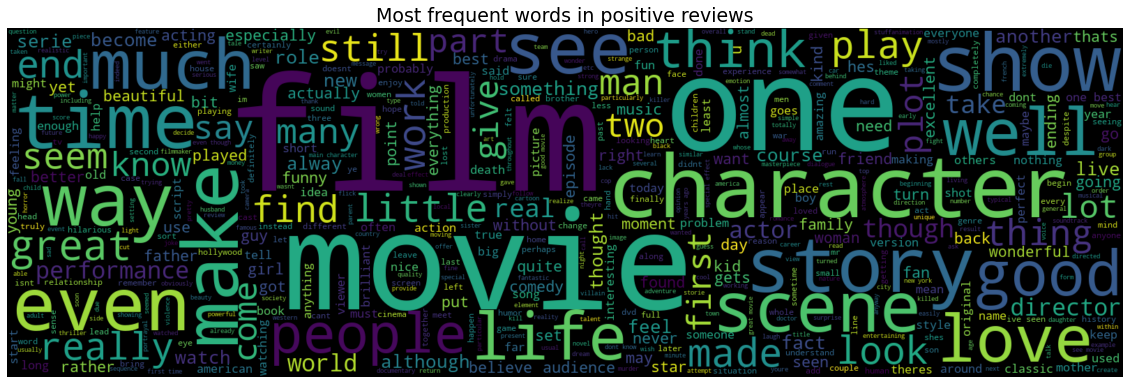

In [ ]:
text=" ".join([word for word in pos_reviews["review"]])
plt.figure(figsize=(20,15), facecolor="None")
wordcloud=WordCloud(max_words=500, width=1600, height=500).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most frequent words in positive reviews", fontsize=19)
plt.show()

In [ ]:
from collections import Counter
count=Counter()
for text in pos_reviews["review"].values:
  for word in text.split():
    count[word]+=1
pos_words=pd.DataFrame(count.most_common(15))
pos_words.columns=["word", "count"]
pos_words.head()


NameError: ignored

In [ ]:
px.bar(pos_words, x="count", y="word", title="Common words in Positive Reviews", color="word")

In [ ]:
#Factorizing the Data
X= df["review"]
Y= df["sentiment"]

In [ ]:
vect=TfidfVectorizer()
X=vect.fit_transform(df["review"])

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221707)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221707)
Size of y_test:  (14874,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred= logreg.predict(x_test)
logreg_acc= accuracy_score(logreg_pred, y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 89.00%


In [ ]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))


[[6453  908]
 [ 728 6785]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.88      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [ ]:
mnb= MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred= mnb.predict(x_test)
mnb_acc= accuracy_score(mnb_pred, y_test)
print("Test Accuracy: {:.2f}%".format(mnb_acc*100))

Test Accuracy: 86.44%


In [ ]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6418  943]
 [1074 6439]]


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      7361
           1       0.87      0.86      0.86      7513

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [ ]:
svc= LinearSVC()
svc.fit(x_train, y_train)
svc_pred= svc.predict(x_test)
svc_acc= accuracy_score(svc_pred, y_test)
print("Test Accuracy: {:.2f}%".format(svc_acc*100))

Test Accuracy: 89.22%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6504  857]
 [ 747 6766]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.89      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid={"C":[0.1, 1, 10, 100], "loss":["hinge", "squared_hinge"]}
grid= GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.3s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.2s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.3s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.4s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.4s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.4s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.4s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.4s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.4s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.8s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [ ]:
print("Best Cross Validation Score: {:.2f}".format(grid.best_score_))
print("Best Parameters: ", grid.best_params_)

Best Cross Validation Score: 0.89
Best Parameters:  {'C': 1, 'loss': 'hinge'}


In [ ]:
#Tuned SVC
svc= LinearSVC(C=1, loss="hinge")
svc.fit(x_train, y_train)
svc_pred= svc.predict(x_test)
svc_acc= accuracy_score(svc_pred, y_test)
print("Test Accuracy: {:.2f}%".format(svc_acc*100))

Test Accuracy: 89.41%


In [ ]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6511  850]
 [ 725 6788]]


              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7361
           1       0.89      0.90      0.90      7513

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874

